shape:
(79795,)
(80001,)
(80000,)
(11000,)
(8184,)
(8184,)
(8184,)
(8184,)
(8184,)
(8184,)
(30000,)
(30000,)
(30000,)
(30000,)
(200000,)
(30000,)
(30000,)
(30000,)
(12000,)
(12000,)
(12000,)
(12000,)
(12000,)
(7501,)
(7501,)

 data figure show


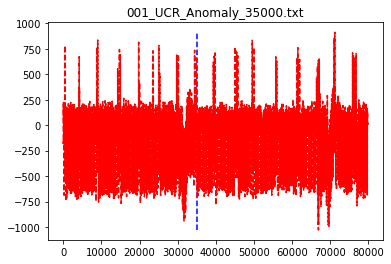

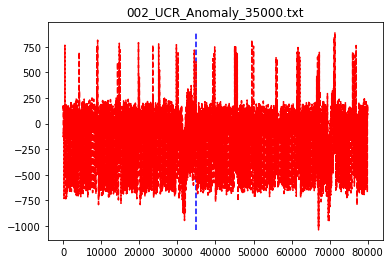

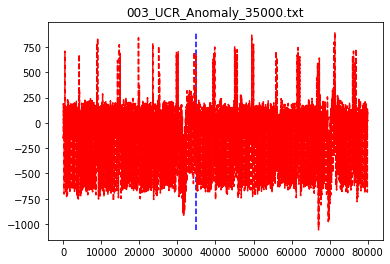

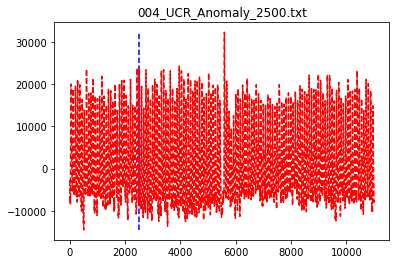

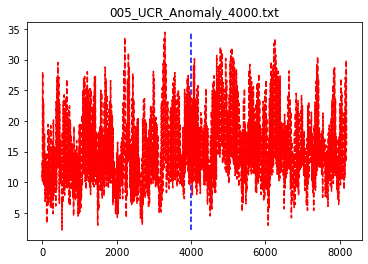

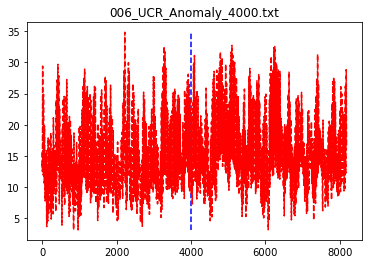

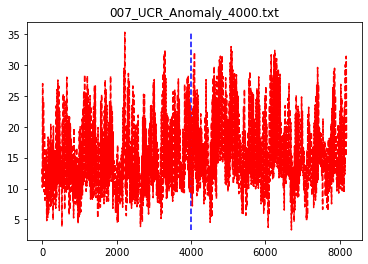

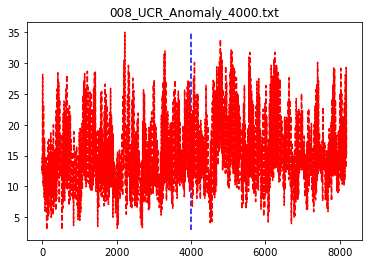

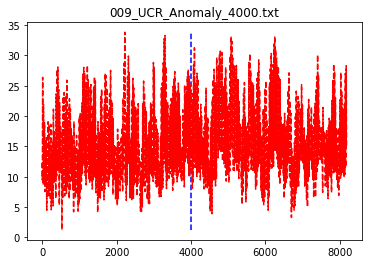

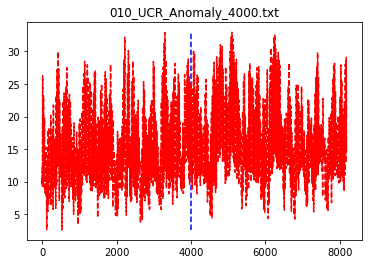

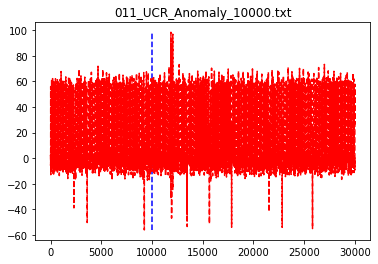

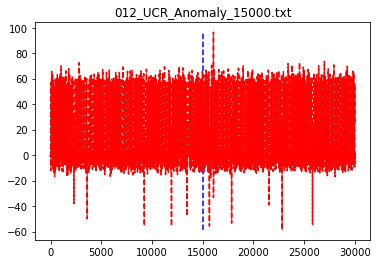

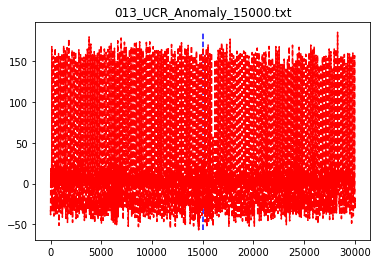

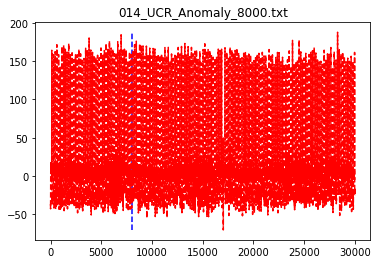

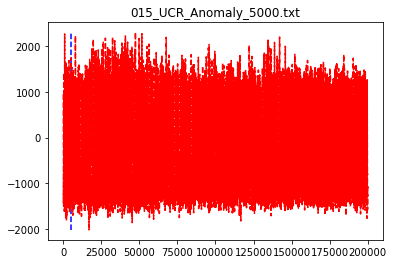

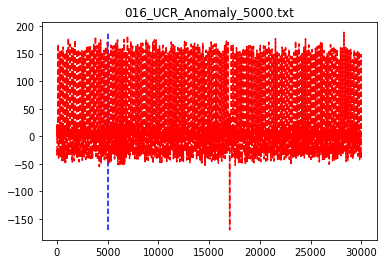

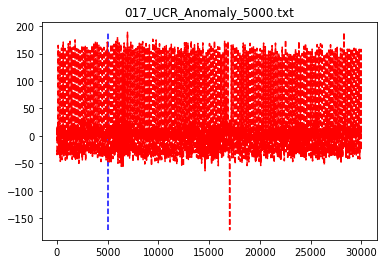

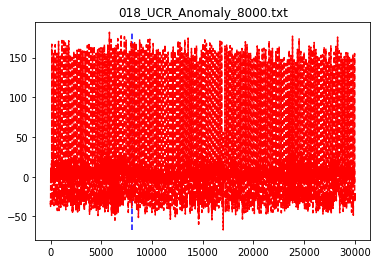

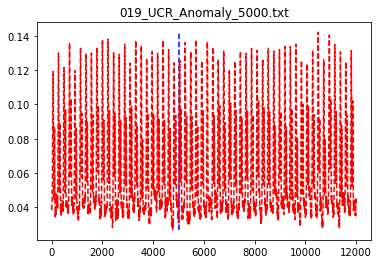

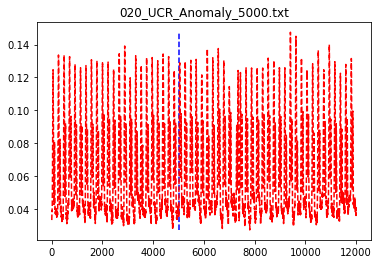

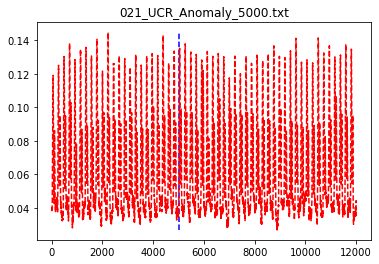

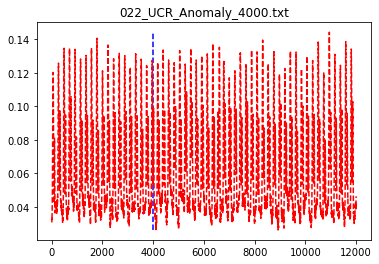

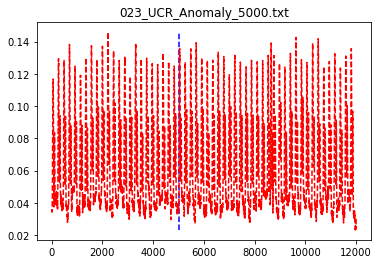

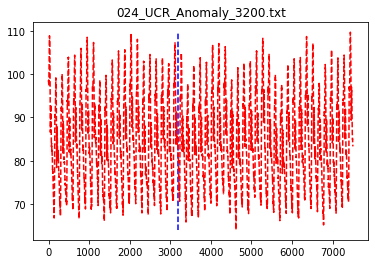

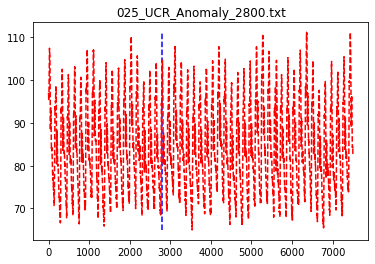


 predict interval:
[array([29373, 29374, 29372]), array([56597, 56598, 56599]), array([46803, 46802, 75716]), array([5484, 5485, 5483]), array([5299, 5300, 5298]), array([5671, 5672, 5673]), array([6448, 6447, 6446]), array([7171, 7172, 7170]), array([4842, 4843, 4818]), array([5973, 5974, 5975]), array([11944, 11934, 11935]), array([25849, 25848, 25850]), array([ 6025,  6024, 16000]), array([16971, 16974, 16972]), array([ 17099,  17098, 177746]), array([16949, 16948, 16950]), array([16948, 16947, 16949]), array([ 6027,  6026, 16920]), array([4249, 5340, 5341]), array([2512, 2513, 2514]), array([11029, 11030, 11028]), array([3166, 8394, 3174]), array([994, 993, 995]), array([4476, 4477, 4475]), array([5555, 5556, 5557])]

 sort interval:
[29373, 56598, 46803, 5484, 5299, 5672, 6447, 7171, 4842, 5974, 11935, 25849, 6025, 16972, 17099, 16949, 16948, 6027, 5340, 2513, 11029, 3174, 994, 4476, 5556]

 generate file:


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matrixprofile as mp
import os
import csv


#读取所有文件
def read_csv_file():
    yseries = []
    index_dict = []
    index_normal = []
    files = os.listdir('./PhaseI/')
    # print(files) # 文件名
    for f in files:
        idx = f.split('/')[-1]
        # print(idx) # 每个长度
        csv_path = './PhaseI/' + f
        df = pd.read_csv(csv_path, names=['values'])
        values = df['values'].values
        print(values.shape)
        yseries.append(values)
        index_dict.append(idx)
        index_normal.append(idx.split('_')[3].split('.')[0])
    return yseries, index_dict, index_normal


def show_figure(values, index_dict, index_normal):
    for index, value in enumerate(values):
        ids = np.arange(1, value.shape[0] + 1, 1, int)
        max = np.max(value)  #max value index
        min = np.min(value)  #min value index
        plt.plot(ids, value, 'r--')
        plt.vlines(int(index_normal[index]), min, max, colors="b", linestyles="dashed")
        plt.title(index_dict[index])  # 添加图形标题
        plt.savefig('./' + index_dict[index] + '.jpg')
        plt.show()


def compute_an(values, window_size=100):
    res = []
    for value in values:
        profile = mp.compute(value, window_size)  # todo
        re = mp.discover.discords(profile)['discords']  # todo
        res.append(re)
    return res

def gen_result_file(res_avg):
    csvFile = open("./submissionsample.csv", 'w', newline='')
    try:
        writer = csv.writer(csvFile)
        writer.writerow(('No.', 'location'))
        for index, value in enumerate(res_avg):
            writer.writerow((index + 1, value))
    finally:
        csvFile.close()

print('shape:')
values, index_dict, index_normal = read_csv_file()

print('\n data figure show')
show_figure(values, index_dict, index_normal)

print('\n predict interval:')
res=compute_an(values)
print(res) # 每段区间

print('\n sort interval:')
res_avg=[]
for i in res:
    t=np.sort(i)
    res_avg.append(t[1])
print(res_avg)

print('\n generate file:')
gen_result_file(res_avg)
print('\n generate file done:')